# Movie success model

In [1]:
import numpy as np
import pandas as pd

This is a template for your final project. 

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
full_dataset = pd.read_csv('IMDb movies.csv')
full_dataset.head(3)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,NaN,NaN,NaN,7.0,7.0
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.9,171,NaN,NaN,NaN,NaN,4.0,2.0
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,420,$ 45000,NaN,NaN,NaN,24.0,3.0


## Part 1.

## Task formalization and Evaluation criteria

### 1.1 Select your target variable, explain your choice. Separate target variable from the feature matrix.

Let's dive a litle bit deeper to the data to chouse target variable. 

In [5]:
full_dataset.head(5)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,NaN,NaN,NaN,7.0,7.0
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.9,171,NaN,NaN,NaN,NaN,4.0,2.0
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,420,$ 45000,NaN,NaN,NaN,24.0,3.0
3,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2019,NaN,NaN,NaN,NaN,28.0,14.0
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,...,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ...",5.7,438,NaN,NaN,NaN,NaN,12.0,5.0


The target variables can be linked with popularity of Movie or commertial success of Movie.
Criteria of popularity is scores as avg_vote or metascore. Commertial success is depends of budget and incomes, which mostly depends on box ofice. So, we will focus on core 'avg_vote'.

In [6]:
full_dataset.dtypes

imdb_title_id             object
title                     object
original_title            object
year                       int64
date_published            object
genre                     object
duration                   int64
country                   object
language                  object
director                  object
writer                    object
production_company        object
actors                    object
description               object
avg_vote                 float64
votes                      int64
budget                    object
usa_gross_income          object
worlwide_gross_income     object
metascore                float64
reviews_from_users       float64
reviews_from_critics     float64
dtype: object

In [7]:
print(full_dataset.isna().sum())

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                      5
language                   480
director                    24
writer                     808
production_company        2744
actors                      30
description               1993
avg_vote                     0
votes                        0
budget                   43379
usa_gross_income         48306
worlwide_gross_income    41062
metascore                51386
reviews_from_users        4069
reviews_from_critics      8229
dtype: int64


<AxesSubplot:>

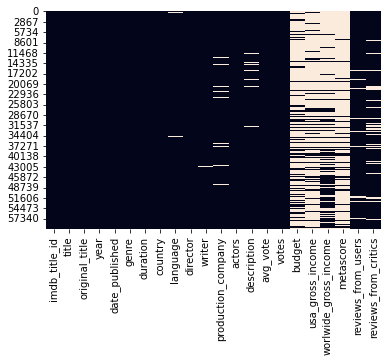

In [8]:
sns.heatmap(full_dataset.isna(), cbar=False)

To identify 'Successful' movie we analyze 'avg_vote'.

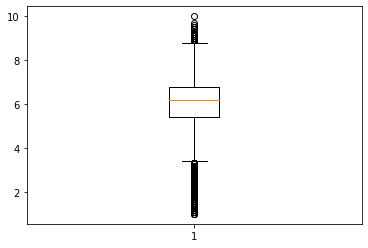

In [9]:
plt.boxplot(full_dataset['avg_vote'])
plt.show()

count    60198.000000
mean         5.997349
std          1.199483
min          1.000000
25%          5.400000
50%          6.200000
75%          6.800000
max         10.000000
Name: avg_vote, dtype: float64


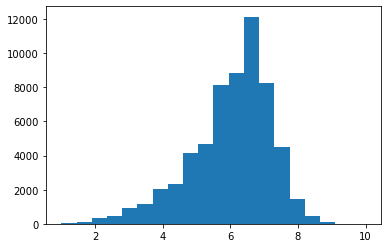

In [10]:
print(full_dataset['avg_vote'].describe())
plt.hist(full_dataset['avg_vote'], bins=20)
plt.show()

 Median value is 6.2, mean = 5.99. 
 Let's use Q75=6.8 value as a cutoff for successful movies. 

In [28]:
full_dataset = full_dataset[full_dataset['worlwide_gross_income'].notna()]
full_dataset = full_dataset[full_dataset['usa_gross_income'].notna()]
full_dataset = full_dataset[full_dataset['budget'].notna()]

full_dataset['profit'] = full_dataset['worlwide_gross_income'] - full_dataset['budget']

In [29]:
full_dataset['target']  = np.where(
    ((full_dataset['avg_vote'] >= 6.8) & (full_dataset['votes'] > 100) &  (full_dataset['reviews_from_users'] > 0))
, 1, 0)

target = full_dataset.target

feature_matrix = full_dataset.drop(['avg_vote',
                                    'votes',
                                    'reviews_from_users',
                                    'reviews_from_critics'], axis=1)

In [30]:
target.describe()

count    6638.000000
mean        0.363513
std         0.481047
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [31]:
feature_matrix

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,budget,usa_gross_income,worlwide_gross_income,metascore,target,profit
155,tt0010323,Das Cabinet des Dr. Caligari,Das Cabinet des Dr. Caligari,1920,1920-02-27,"Fantasy, Horror, Mystery",76,Germany,German,Robert Wiene,"Carl Mayer, Hans Janowitz",Decla-Bioscop AG,"Werner Krauss, Conrad Veidt, Friedrich Feher, ...","Hypnotist Dr. Caligari uses a somnambulist, Ce...",18000.0,8811.0,8811.0,NaN,1,-9189.0
232,tt0012190,The Four Horsemen of the Apocalypse,The Four Horsemen of the Apocalypse,1921,1923-01-08,"Drama, Romance, War",150,USA,NaN,Rex Ingram,"Vicente Blasco Ibáñez, June Mathis",Metro Pictures Corporation,"Pomeroy Cannon, Josef Swickard, Bridgetta Clar...",An extended family split up in France and Germ...,800000.0,9183673.0,9183673.0,NaN,1,8383673.0
488,tt0017136,Metropolis,Metropolis,1927,1927-02-06,"Drama, Sci-Fi",153,Germany,German,Fritz Lang,"Thea von Harbou, Thea von Harbou",Universum Film (UFA),"Alfred Abel, Gustav Fröhlich, Rudolf Klein-Rog...",In a futuristic city sharply divided between t...,6000000.0,1236166.0,1349711.0,98.0,1,-4650289.0
1005,tt0021749,City Lights,City Lights,1931,1931-08-21,"Comedy, Drama, Romance",87,USA,English,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,"Virginia Cherrill, Florence Lee, Harry Myers, ...","With the aid of a wealthy erratic tippler, a d...",1500000.0,19181.0,32609.0,99.0,1,-1467391.0
2336,tt0027977,Modern Times,Modern Times,1936,1936-10-16,"Comedy, Drama, Family",87,USA,English,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,"Charles Chaplin, Paulette Goddard, Henry Bergm...",The Tramp struggles to live in modern industri...,1500000.0,163577.0,445226.0,96.0,1,-1054774.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60112,tt1828959,Make Your Move,Make Your Move,2013,2014-04-17,"Drama, Musical, Romance",110,"South Korea, USA",English,Duane Adler,Duane Adler,CJ Entertainment,"Derek Hough, BoA, Will Yun Lee, Wesley Jonatha...",A pair of star-crossed dancers in New York fin...,15000000.0,125106.0,1471106.0,40.0,0,-13528894.0
60117,tt1828995,La délicatesse,La délicatesse,2011,2012-04-13,"Comedy, Drama, Romance",108,France,"French, Swedish","David Foenkinos, Stéphane Foenkinos","David Foenkinos, David Foenkinos",2.4.7. Films,"Audrey Tautou, François Damiens, Bruno Todesch...",A French woman mourning over the death of her ...,7000000.0,498584.0,9696204.0,53.0,0,2696204.0
60118,tt1829012,Passion,Passion,2012,2013-02-13,"Drama, Mystery, Thriller",102,"France, Germany","English, German",Brian De Palma,"Brian De Palma, Natalie Carter",SBS Productions,"Rachel McAdams, Noomi Rapace, Karoline Herfurt...",The rivalry between the manipulative boss of a...,20000000.0,92181.0,713616.0,53.0,0,-19286384.0
60137,tt1831609,Cô dâu dai chien,Cô dâu dai chien,2011,2011-01-28,Comedy,100,Vietnam,Vietnamese,Victor Vu,"Hong Phuc, Victor Vu",HKFilm,"Ngoc Diep, Huy Khanh, Ngan Khanh, Khanh Le, Da...","In the heart of Saigon, Thai and Linh are gett...",500000.0,64572.0,64572.0,NaN,0,-435428.0


### 1.2 Explain which task are you going to solve (is it a regression, classification or something else)? 

We will use classification to solve the task. Successful movies are movies with score > cutoff, which is equal 6.8

### 1.3 Select a metric. Is it already implemented in sklearn? If yes, import it. If not, it is time to write a function which will calculate it. 

For estimation of quality of models we will use F1-score, and additionaly accuracy score.

In [32]:
from sklearn.metrics import f1_score

In [33]:
print("Number of successful movies in data set =", target.sum())
print("Number of not successful movies in data set =", target.shape[0]-target.sum())

Number of successful movies in data set = 2413
Number of not successful movies in data set = 4225


## Part 2.

Explore and preprocess the data

### 2.1 Split data into train and test

Lets convert incomes and budgets to numerical. And calculate 'Profit' as a difference betwiin income and budget.

In [34]:
def convert_to_numeric(value):
    if isinstance(value, str):
        for symbol in value:
            if not symbol.isdigit():
                value = value.replace(symbol, '')
    return float(value)

# remove non-numeric symbols from 'usa_gross_income', 'worlwide_gross_income', 'budget' and convert to float
full_dataset['usa_gross_income'] = full_dataset['usa_gross_income'].apply(convert_to_numeric)
full_dataset['worlwide_gross_income'] = full_dataset['worlwide_gross_income'].apply(convert_to_numeric)
full_dataset['budget'] = full_dataset['budget'].apply(convert_to_numeric)
full_dataset['profit'] = full_dataset['worlwide_gross_income'] - full_dataset['budget']


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_matrix, target, test_size=0.3, random_state=30)

X_train.drop(['target'], axis=1, inplace=True)
X_test.drop(['target'], axis=1, inplace=True)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4646, 19) (1992, 19) (4646,) (1992,)


### 2.2 Explore you data: make plots, print tables. Make sure to write your observations.  Do not forget to fill-in missing values, define relevant columns transformatios. 


In [36]:
full_dataset.head(3)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,target,profit
155,tt0010323,Das Cabinet des Dr. Caligari,Das Cabinet des Dr. Caligari,1920,1920-02-27,"Fantasy, Horror, Mystery",76,Germany,German,Robert Wiene,...,8.1,51644,18000.0,8811.0,8811.0,NaN,218.0,148.0,1,-9189.0
232,tt0012190,The Four Horsemen of the Apocalypse,The Four Horsemen of the Apocalypse,1921,1923-01-08,"Drama, Romance, War",150,USA,NaN,Rex Ingram,...,7.2,2935,800000.0,9183673.0,9183673.0,NaN,44.0,16.0,1,8383673.0
488,tt0017136,Metropolis,Metropolis,1927,1927-02-06,"Drama, Sci-Fi",153,Germany,German,Fritz Lang,...,8.3,148396,6000000.0,1236166.0,1349711.0,98.0,471.0,194.0,1,-4650289.0


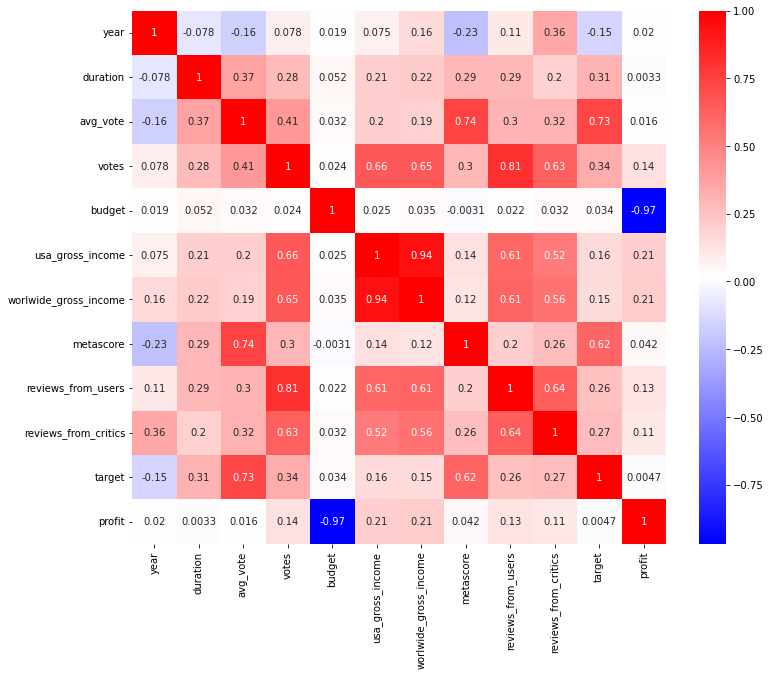

In [37]:
numerical_features = full_dataset.select_dtypes(include=[np.number])
corr = numerical_features.corr()
fig, ax = plt.subplots(figsize=(10,8))
fig.tight_layout()
sns.heatmap(corr, annot=True, cmap=plt.cm.bwr)
plt.show()


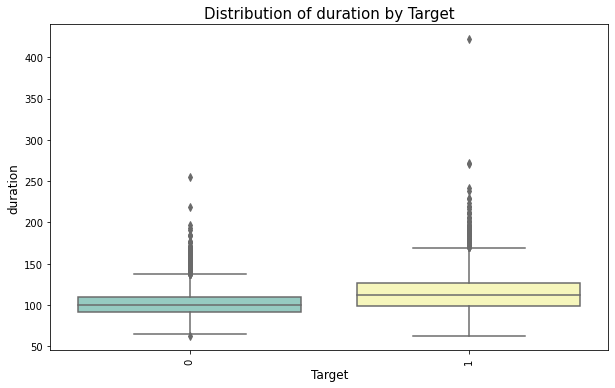

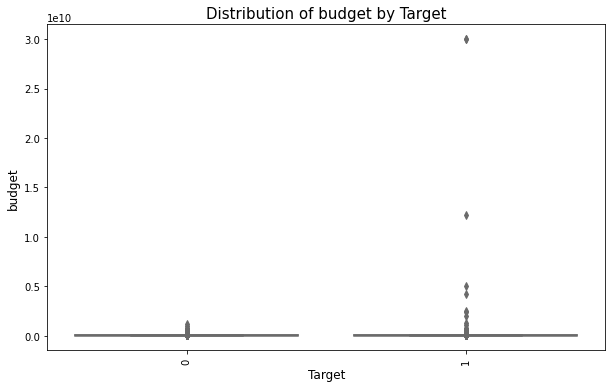

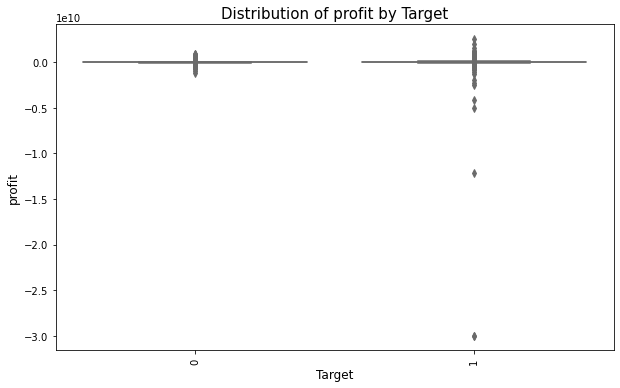

In [38]:
numerical_features = ['duration', 'budget', 'profit']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='target', y=feature, data=full_dataset, palette='Set3')
    plt.xlabel('Target', fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.title("Distribution of " + feature + " by Target", fontsize=15)
    plt.xticks(rotation='vertical')
    plt.show()

In [39]:
print(corr['target'].sort_values(ascending=False)[:10])

target                   1.000000
avg_vote                 0.728285
metascore                0.615249
votes                    0.338295
duration                 0.313101
reviews_from_critics     0.274499
reviews_from_users       0.259755
usa_gross_income         0.160601
worlwide_gross_income    0.152767
budget                   0.033886
Name: target, dtype: float64


We calculate profit and no more need on 'usa_gross_income', 'worlwide_gross_income' 

In [40]:
X_train.drop(['imdb_title_id', 'year', 'usa_gross_income', 'worlwide_gross_income', 'metascore'], axis=1, inplace=True)
X_test.drop(['imdb_title_id', 'year', 'usa_gross_income', 'worlwide_gross_income', 'metascore'], axis=1, inplace=True)


In [41]:
X_train

,title,original_title,date_published,genre,duration,country,language,director,writer,production_company,actors,description,budget,profit
25206,Hook,Hook,1992-04-10,"Adventure, Comedy, Family",142,USA,English,Steven Spielberg,"J.M. Barrie, J.M. Barrie",Amblin Entertainment,"Dustin Hoffman, Robin Williams, Julia Roberts,...","When Captain Hook kidnaps his children, an adu...",70000000.0,230854823.0
29718,Dream with the Fishes,Dream with the Fishes,1997-06-20,"Comedy, Drama",97,USA,English,Finn Taylor,"Finn Taylor, Jeffrey D. Brown",3 Ring Circus Films,"David Arquette, Brad Hunt, Cathy Moriarty, Kat...",Terry is a suicidal voyeur who treats a dying ...,1000000.0,-456292.0
26751,The Pelican Brief,The Pelican Brief,1994-02-25,"Crime, Drama, Mystery",141,USA,English,Alan J. Pakula,"John Grisham, Alan J. Pakula",Warner Bros.,"Julia Roberts, Denzel Washington, Sam Shepard,...","A law student uncovers a conspiracy, putting h...",45000000.0,150268056.0
53883,Kick-Ass,Kick-Ass,2010-03-26,"Action, Adventure, Comedy",117,"UK, USA",English,Matthew Vaughn,"Jane Goldman, Matthew Vaughn",Marv Films,"Aaron Taylor-Johnson, Garrett M. Brown, Evan P...",Dave Lizewski is an unnoticed high school stud...,30000000.0,66188903.0
12370,Who's Afraid of Virginia Woolf?,Who's Afraid of Virginia Woolf?,1967-03-31,Drama,131,USA,"English, Latin, Spanish",Mike Nichols,Ernest Lehman,Warner Bros.,"Elizabeth Taylor, Richard Burton, George Segal...","A bitter, aging couple, with the help of alcoh...",7500000.0,20505068.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49548,Sunshine Cleaning,Sunshine Cleaning,2009-06-26,"Comedy, Drama",91,USA,"English, Spanish",Christine Jeffs,Megan Holley,Overture Films,"Amy Adams, Emily Blunt, Alan Arkin, Jason Spev...",In order to raise the tuition to send her youn...,8000000.0,8580250.0
19709,Fast Times at Ridgemont High,Fast Times at Ridgemont High,1983-01-07,"Comedy, Drama",90,USA,English,Amy Heckerling,"Cameron Crowe, Cameron Crowe",Universal Pictures,"Sean Penn, Jennifer Jason Leigh, Judge Reinhol...",A group of Southern California high school stu...,4500000.0,22592880.0
41462,Twist,Twist,2005-09-28,Drama,97,Canada,English,Jacob Tierney,"Charles Dickens, Jacob Tierney",Victorious Films,"Nick Stahl, Gary Farmer, Stephen McHattie, Tyg...","A queer ""Oliver Twist"" update set in the hustl...",350000.0,-302630.0
45080,Fremde Haut,Fremde Haut,2005-10-20,Drama,97,"Germany, Austria","German, Persian, English, Russian",Angelina Maccarone,"Angelina Maccarone, Judith Kaufmann",Fischer Film,"Jasmin Tabatabai, Navid Navid, Mossadegh Hamid...",The educated Fariba Tabrizi flies from Teheran...,2000000.0,-1996975.0


At the next steps we will explore data and select wich one we will keep or drop.

Director:

In [42]:
X_train.director.fillna('Unknown', inplace=True)
X_test.director.fillna('Unknown', inplace=True)
X_train.director.isna().sum(), X_test.director.isna().sum()

(0, 0)

In [43]:
from collections import Counter

words_in_director = feature_matrix.director.values.tolist()
counts = Counter(words_in_director)
most_popular_dirctors = list(x[0] for x in counts.most_common(30))
counts.most_common(30)

[('Woody Allen', 35),
 ('Clint Eastwood', 32),
 ('Steven Spielberg', 28),
 ('Steven Soderbergh', 23),
 ('Martin Scorsese', 22),
 ('Ridley Scott', 20),
 ('Ron Howard', 20),
 ('Brian De Palma', 19),
 ('Joel Schumacher', 19),
 ('Rainer Werner Fassbinder', 18),
 ('Oliver Stone', 18),
 ('Barry Levinson', 18),
 ('Spike Lee', 18),
 ('Walter Hill', 16),
 ('Tim Burton', 16),
 ('Renny Harlin', 16),
 ('Mike Nichols', 15),
 ('Francis Ford Coppola', 15),
 ('Sidney Lumet', 15),
 ('Richard Donner', 15),
 ('John Carpenter', 15),
 ('Robert Zemeckis', 15),
 ('Wes Craven', 15),
 ('John Sayles', 15),
 ('Rob Reiner', 15),
 ('Robert Altman', 14),
 ('John Landis', 14),
 ('Ivan Reitman', 14),
 ('Sam Raimi', 14),
 ('Tony Scott', 14)]

In [44]:
X_train['popular_dirctor'] = np.where(np.isin(X_train['director'],most_popular_dirctors), 1, 0)
X_test['popular_dirctor'] = np.where(np.isin(X_test['director'],most_popular_dirctors), 1, 0)

X_test[X_train.columns.difference(X_test.columns)] = 0
X_train[X_test.columns.difference(X_train.columns)] = 0

X_train.drop(["director"], axis=1, inplace=True)
X_test.drop(["director"], axis=1, inplace=True)

Title - drop

In [45]:
X_train.drop(["title"], axis=1, inplace=True)
X_test.drop(["title"], axis=1, inplace=True)

Original Title - drop

In [46]:
X_train.drop(["original_title"], axis=1, inplace=True)
X_test.drop(["original_title"], axis=1, inplace=True)

description - drop

In [47]:
X_train.drop(["description"], axis=1, inplace=True)
X_test.drop(["description"], axis=1, inplace=True)

Writer - drop

In [48]:
X_train.drop(["writer"], axis=1, inplace=True)
X_test.drop(["writer"], axis=1, inplace=True)

date_published - drop

In [49]:
X_train.drop(["date_published"], axis=1, inplace=True)
X_test.drop(["date_published"], axis=1, inplace=True)

Actors

In [50]:
feature_matrix.actors.isna().sum()

0

In [51]:
X_train.actors.fillna('Unknown', inplace=True)
X_test.actors.fillna('Unknown', inplace=True)

In [52]:
feature_matrix.actors.values
all_actors = ' '.join(str(x) for x in feature_matrix.actors.values).split(", ")

In [53]:
from collections import Counter

words_in_actors = all_actors
counts = Counter(words_in_actors)
most_popular_actors = list(x[0] for x in counts.most_common(500))
counts.most_common(10)

[('Samuel L. Jackson', 43),
 ('Christopher Walken', 42),
 ('Richard Jenkins', 41),
 ('Steve Buscemi', 40),
 ('Keith David', 38),
 ('John Hurt', 37),
 ('Morgan Freeman', 36),
 ('Alec Baldwin', 35),
 ('Danny DeVito', 34),
 ('Bruce McGill', 33)]

In [54]:
most_popular_actors = '|'.join(most_popular_actors)

In [55]:
import re

X_train["popular_actor"] = np.where((X_train.actors.str.contains(most_popular_actors, regex=True)), 1, 0)
X_test["popular_actor"] = np.where((X_test.actors.str.contains(most_popular_actors, regex=True)), 1, 0)

In [56]:
features_to_drop = ["actors"]

X_train.drop(["actors"], axis=1, inplace=True)
X_test.drop(["actors"], axis=1, inplace=True)

Country

In [57]:
X_train.country.isna().sum()
X_test.country.isna().sum()

0

In [58]:
X_train.country.fillna('Unknown', inplace=True)
X_test.country.fillna('Unknown', inplace=True)

X_train = pd.concat([X_train, X_train.country.str.get_dummies(sep=', ').add_prefix('country_')], axis = 1)
X_test = pd.concat([X_test, X_test.country.str.get_dummies(sep=', ').add_prefix('country_')], axis = 1)

X_test[X_train.columns.difference(X_test.columns)] = 0
X_train[X_test.columns.difference(X_train.columns)] = 0

In [59]:
X_train.drop(["country"], axis=1, inplace=True)
X_test.drop(["country"], axis=1, inplace=True)

In [60]:
X_train.shape, X_test.shape

((4646, 117), (1992, 117))

Language

In [61]:
X_train.language.isna().sum()
X_test.language.isna().sum()

2

In [62]:
X_train.language.fillna('English', inplace=True)
X_test.language.fillna('English', inplace=True)

X_train = pd.concat([X_train, X_train.language.str.get_dummies(sep=', ').add_prefix('language_')], axis = 1)
X_test = pd.concat([X_test, X_test.language.str.get_dummies(sep=', ').add_prefix('language_')], axis = 1)

X_test[X_train.columns.difference(X_test.columns)] = 0
X_train[X_test.columns.difference(X_train.columns)] = 0

In [63]:
X_train.drop(["language"], axis=1, inplace=True)
X_test.drop(["language"], axis=1, inplace=True)

In [64]:
X_train.shape, X_test.shape

((4646, 278), (1992, 278))

production_company

In [65]:
X_train.production_company.isna().sum()
X_test.production_company.isna().sum()

13

In [66]:
X_train.production_company.fillna('Other', inplace=True)
X_test.production_company.fillna('Other', inplace=True)

In [67]:
from sklearn.preprocessing import MultiLabelBinarizer

vector_mlb = MultiLabelBinarizer(sparse_output=True)

X_train.production_company = X_train.production_company.str.split(', ')
X_test.production_company = X_test.production_company.str.split(', ')

In [68]:
X_train = X_train.merge(pd.DataFrame.sparse.from_spmatrix(vector_mlb.fit_transform(X_train.production_company), 
                                                          X_train.index, 'production_company_' + vector_mlb.classes_), 
                        left_index=True, 
                        right_index=True)
X_test = X_test.merge(pd.DataFrame.sparse.from_spmatrix(vector_mlb.transform(X_test.production_company), 
                                                        X_test.index, 'production_company_' + vector_mlb.classes_),
                      left_index=True, 
                      right_index=True)

In [69]:
X_train.drop(["production_company"], axis=1, inplace=True)
X_test.drop(["production_company"], axis=1, inplace=True)

In [70]:
X_train.shape, X_test.shape

((4646, 2166), (1992, 2166))

genre

In [71]:
X_train = pd.concat([X_train, X_train.genre.str.get_dummies(sep=', ').add_prefix('genre_')], axis = 1)
X_test = pd.concat([X_test, X_test.genre.str.get_dummies(sep=', ').add_prefix('genre_')], axis = 1)

X_test[X_train.columns.difference(X_test.columns)] = 0
X_train[X_test.columns.difference(X_train.columns)] = 0

In [72]:
X_train.drop(["genre"], axis=1, inplace=True)
X_test.drop(["genre"], axis=1, inplace=True)

In [73]:
X_train.shape, X_test.shape

((4646, 2186), (1992, 2186))

In [74]:
unique = 1 - X_train.astype(bool).sum(axis=0) / X_train.shape[0]
unique = unique[unique > 0.995]

In [75]:
X_train.drop(unique.index, axis=1, inplace=True)
X_test.drop(unique.index, axis=1, inplace=True)

In [76]:
X_train.shape, X_test.shape

((4646, 90), (1992, 90))

In [77]:
X_train.columns.difference(X_test.columns)

Index([], dtype='object')

In [78]:
X_train.drop(["budget"], axis=1, inplace=True)
X_test.drop(["budget"], axis=1, inplace=True)

In [79]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline

num_col = ['duration', 
           'month_published']

num_pipe = make_pipeline(
    SimpleImputer(missing_values=np.nan, strategy='most_frequent'),
    StandardScaler())

column_transformer = ColumnTransformer([('num', num_pipe, num_col),], remainder='passthrough')

## Part 3.

Train and compare the models

### 3.1. Select models, you are going to train, select hyperparameters that have to be tunes.

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


In [81]:
num_col = ['duration']
num_pipe = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())

column_transformer = ColumnTransformer(transformers=[('num', num_pipe, num_col)], remainder='passthrough')

In [90]:
# random forest
Random_Forest_pipe = Pipeline([('column_transformer', column_transformer),
                               ('estimator', RandomForestClassifier())])


Random_Forest_param_grid = {'estimator': [RandomForestClassifier()],
                            'estimator__criterion':  ["gini", "entropy", "log_loss"],
                            'estimator__n_estimators': [100, 500, 1000],
                            'estimator__max_depth': [5, 10, 15],
                            'estimator__min_samples_leaf': [9]
                           }

Random_Forest_grid = GridSearchCV(Random_Forest_pipe, param_grid=Random_Forest_param_grid, cv=5, scoring='f1', n_jobs=-1)
Random_Forest_grid.fit(X_train, y_train)
y_pred = Random_Forest_grid.predict(X_test)

print("Accuracy score =", accuracy_score(y_test, y_pred))
print("F1 score =", f1_score(y_test, y_pred))

Accuracy score = 0.7565261044176707
F1 score = 0.5948203842940685


In [91]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [92]:
# Decision Tree Classifier

DecisionTreeClassifier_pipe = Pipeline([('column_transformer', column_transformer),
                                        ('estimator', DecisionTreeClassifier())])

DecisionTreeClassifier_param_grid = {'estimator': [DecisionTreeClassifier()],
                                     'estimator__max_depth': [3, 5, 6, 9, 12],
                                     'estimator__criterion': ['gini', 'entropy', 'log_loss'],
                                     'estimator__min_samples_leaf': [3, 6, 9, 16, 24, 48]
                           }

DecisionTreeClassifier_grid = GridSearchCV(DecisionTreeClassifier_pipe, param_grid=DecisionTreeClassifier_param_grid, cv=5, scoring='f1', n_jobs=-1)
DecisionTreeClassifier_grid.fit(X_train, y_train)
y_pred = DecisionTreeClassifier_grid.predict(X_test)

print("Accuracy score =", accuracy_score(y_test, y_pred))
print("F1 score =", f1_score(y_test, y_pred))

Accuracy score = 0.7384538152610441
F1 score = 0.6061980347694633


In [93]:
# Gradient Boosting Classifier model

GradientBoosting_pipe = Pipeline([('column_transformer', column_transformer),
                          ('estimator', GradientBoostingClassifier())])

GradientBoosting_param_grid = [{'estimator': [GradientBoostingClassifier()],
                                'estimator__criterion': ['friedman_mse', 'squared_error'],
                                'estimator__learning_rate': [1.7],
                                'estimator__loss': ['exponential'], 
                                'estimator__n_estimators': [500], 
                                'estimator__max_depth': [4], 
                                'estimator__min_samples_leaf': [12]
                               },]

GradientBoosting_grid = GridSearchCV(GradientBoosting_pipe, param_grid=GradientBoosting_param_grid, cv=5, scoring='f1', n_jobs=-1)
GradientBoosting_grid.fit(X_train, y_train)
y_pred = GradientBoosting_grid.predict(X_test)

print("Accuracy score =", accuracy_score(y_test, y_pred))
print("F1 score =", f1_score(y_test, y_pred))

Accuracy score = 0.696285140562249
F1 score = 0.5706174591909156


### 3.2 Use cross-validation to compare models and select best set of hyperparameters

In [94]:
from sklearn.model_selection import cross_val_score

In [95]:
models = [Random_Forest_grid, GradientBoosting_grid, DecisionTreeClassifier_grid]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_train, y_train, scoring='f1', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
    print(cv_df.groupby('model_name').accuracy.mean())


model_name
GridSearchCV    0.561545
Name: accuracy, dtype: float64
model_name
GridSearchCV    0.574822
Name: accuracy, dtype: float64
model_name
GridSearchCV    0.569161
Name: accuracy, dtype: float64


### 3.3 Which model and setup is the best? How does it perform on the test dataset? If you were to present this model to the client, how would you describe it?

We build 3 models: Gradient Boosting Classifier model, Decision Tree Classifier, Random forest. As was calculated above on CV the F1-scores are:
1. Decision Tree Classifier - 0.6062
2. Gradient Boosting Classifier model - 0.5706
3. Random forest - 0.5948

Based on F1-score estimation the best model is *Decision Tree Classifier*

We can recomdend dive deeper to the data mining:
* collect data of popularity of actors of movies and analyse it comprehensivly with initial dataset.
* which budget is suitable? can be more usefull to focus on appliable budget and analyse similar movies.
* focus on targets: do we need income or ranking?
